In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [4]:
data = pd.read_csv('world-food-facts/FoodFacts.csv')

/Users/billkoo/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (0,3,5,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Select foods that are shared by more than 1 country, then prepare it for tokenization by replacing space with "_".  

Then vectorize the list [['France', 'Spain'],['France', 'Sweden']] to matrix form:


|        | France | Spain | Sweden |
|--------|--------|-------|--------|
| France | 0      | 1     | 1      |
| Spain  | 1      | 0     | 0      |
| Sweden | 1      | 0     | 0      |

In [5]:
data_clean = data[data['countries_en'] == data['countries_en']]
shared_food = data_clean[data_clean['countries_en'].str.contains(',')]['countries_en']
shared_food = shared_food.apply(lambda x: x.strip().replace(" ", "_"))
count_model = CountVectorizer(ngram_range=(1,1))
X = count_model.fit_transform(list(shared_food))
Xc = (X.T * X)
Xc.setdiag(0)

Further clean up the matrix ('fr' to 'france'). Select only countries with at least 10 countries with shared food.  

Then double-normalize the matrix on x and y axis. This way countries with large amount of entries such as France will not dominate the food influencer network.  

Make heatmap graph.

In [78]:
shared_food_matrix = pd.DataFrame(Xc.todense(), 
    columns=count_model.get_feature_names(),
    index=count_model.get_feature_names())
shared_food_matrix['france'] = shared_food_matrix['france'] + shared_food_matrix['fr']
shared_food_matrix['spain'] = shared_food_matrix['spain'] + shared_food_matrix['es']
shared_food_matrix = shared_food_matrix.drop(['es','fr'], 0)
shared_food_matrix = shared_food_matrix.drop(['es','fr'], 1)
total = shared_food_matrix.sum()
plot_matrix = shared_food_matrix[total[total.sort_values(ascending=False)>=10
    ].index].loc[total[total.sort_values(ascending=False)>=10].index]
plot_matrix = plot_matrix.apply(lambda x: x/x.sum(),axis=0).apply(lambda x: x/x.sum(),axis=1)

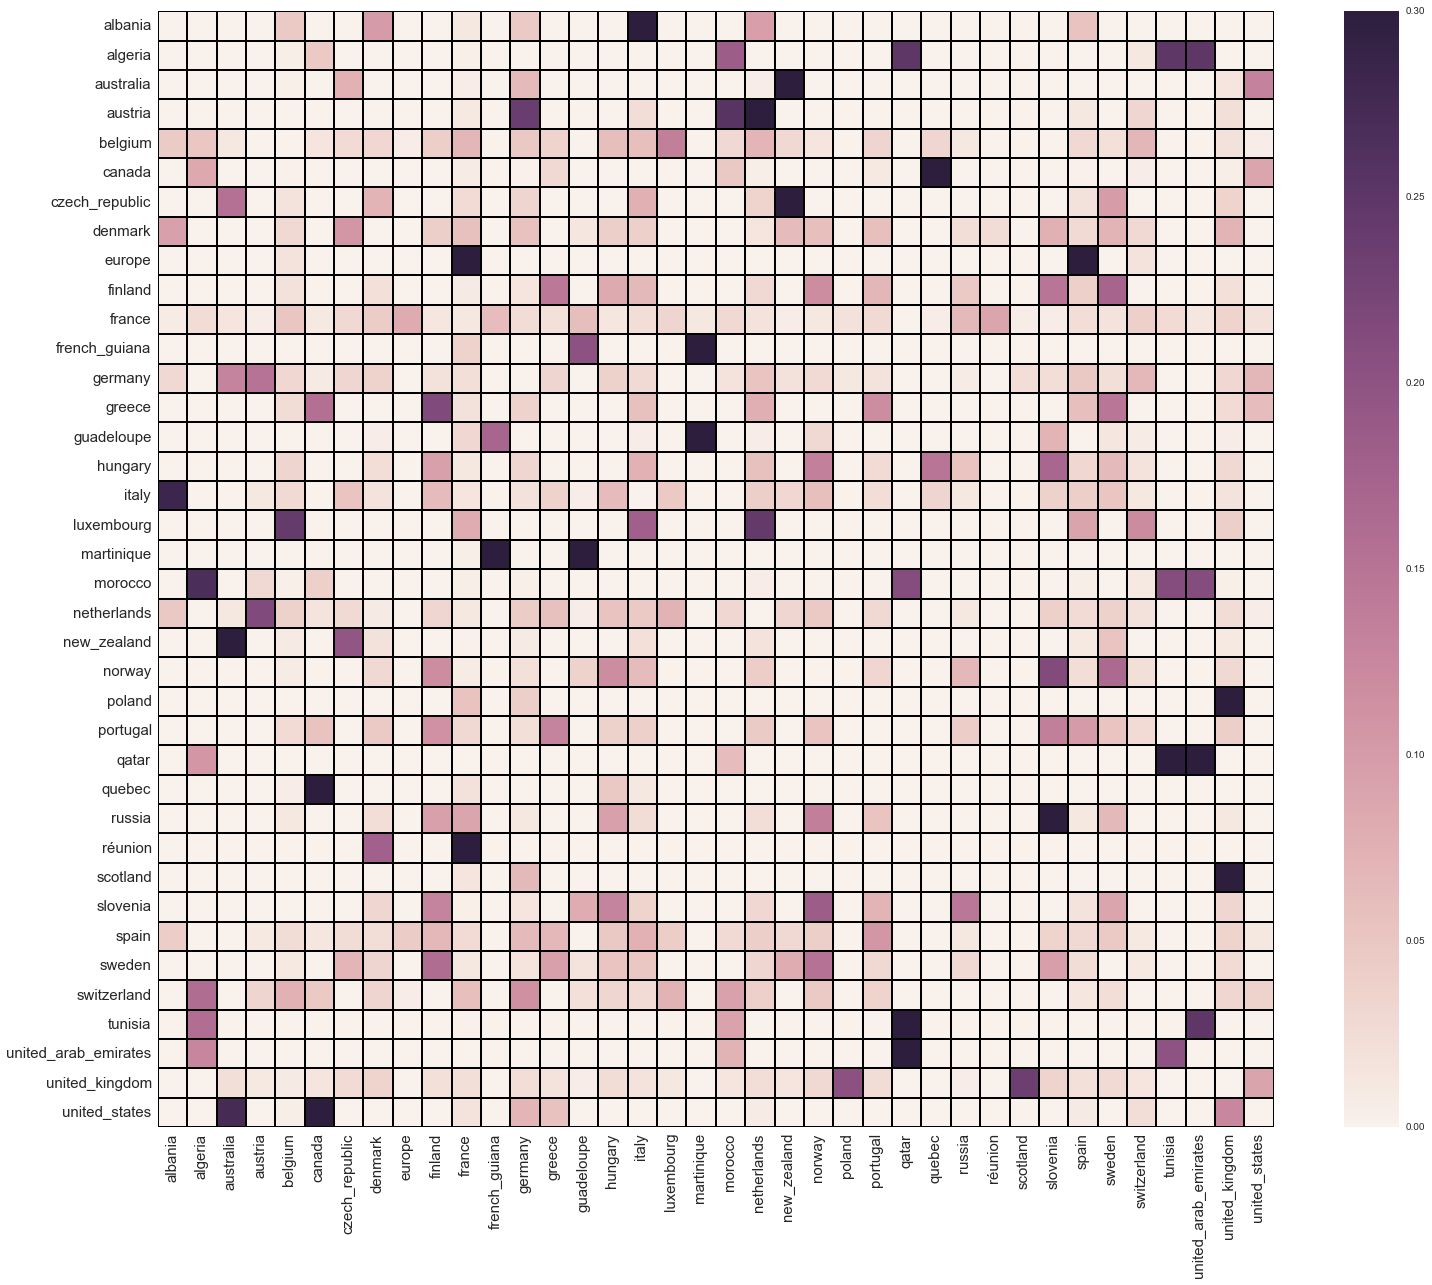

In [79]:
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))
ax.tick_params(axis='both', which='major', labelsize=15)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(plot_matrix, vmax=.3, ax=ax, linecolor='black')

In [4]:
a = {'France,Europe': 'France',
     'France':'France',
     'en:FR':'France',
     'en:ES':'Spain',
     'Espa\xc3\xb1a':'Spain',
     'en:GB':'UK',
     'United Kingdom':'UK',
     'United States':'US',
     'en:US':'US',
     'Australia':'Australia',
     'en:CH':'China',
     'en:CA':'Canada',
     'Deutschland':'Germany',
     'Belgique':'Belgian',
     'en:BE':'Belgian',
     'Brasil':'Brasil',
     'Italia':'Italy',
     'en:IT':'Italy',
     'Suisse':'Switzerland',
     'Portugal':'Portugal'}
    

In [5]:
data_clean['countries_normalized'] = data_clean['countries'].map(lambda x: a[x])

/Users/billkoo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [45]:
aggregations = {
    'energy_100g': { # work on the "duration" column
        'max_energy_100g': 'max',  # get the sum, and call this result 'total_duration'
        'mean_energy_100g': 'mean', # get mean, call result 'average_duration'
        'min_energy_100g': 'min'
    },
    'fat_100g': { # work on the "duration" column
        'max_fat_100g': 'max',  # get the sum, and call this result 'total_duration'
        'mean_fat_100g': 'mean', # get mean, call result 'average_duration'
        'min_fat_100g': 'min'
    },
    'sugars_100g': { # work on the "duration" column
        'max_sugars_100g': 'max',  # get the sum, and call this result 'total_duration'
        'mean_sugars_100g': 'mean', # get mean, call result 'average_duration'
        'min_sugars_100g': 'min'
    },
    'carbohydrates_100g': { # work on the "duration" column
        'max_carbohydrates_100g': 'max',  # get the sum, and call this result 'total_duration'
        'mean_carbohydrates_100g': 'mean', # get mean, call result 'average_duration'
        'min_carbohydrates_100g': 'min'
    },
    'proteins_100g': { # work on the "duration" column
        'max_proteins_100g': 'max',  # get the sum, and call this result 'total_duration'
        'mean_proteins_100g': 'mean', # get mean, call result 'average_duration'
        'min_proteins_100g': 'min'
    }
}

fit_data = data_clean[['energy_100g','fat_100g',
    'sugars_100g','carbohydrates_100g','proteins_100g','countries_normalized']
    ].dropna().groupby('countries_normalized').median()
fit_data.columns = fit_data.columns.get_level_values(0)
fit_data = fit_data.rename_axis(None, axis=0).reset_index()
#X_tsne = TSNE(learning_rate=300,n_iter=2000).fit_transform(fit_data)
#plot_data = pd.DataFrame(X_tsne[:, 0], X_tsne[:, 1]).reset_index()
#plot_data = pd.concat([plot_data, pd.Series(fit_data.index)],axis=1)
#plot_data.columns = ['x','y','country']

In [7]:
food_vector = data_clean[['energy_100g','fat_100g',
    'sugars_100g','carbohydrates_100g','proteins_100g','countries_normalized']].dropna()
X_pca = PCA().fit_transform(food_vector[['energy_100g','fat_100g',
    'sugars_100g','carbohydrates_100g','proteins_100g']])
plot_data = pd.DataFrame(X_pca[:, 0], X_pca[:, 1]).reset_index()
plot_data = pd.concat([plot_data, food_vector['countries_normalized']],axis=1)
plot_data.columns = ['x','y','country']

In [43]:
fit_data

,energy_100g,fat_100g,sugars_100g,carbohydrates_100g,proteins_100g
countries_normalized,,,,,
Australia,889.000,4.400,4.75,15.55,4.35
Belgian,1152.500,6.950,5.35,14.75,5.00
Brasil,1585.000,10.850,14.25,60.45,7.21
France,980.000,6.000,3.80,14.70,6.00
Germany,899.500,4.000,4.20,10.00,5.50
Italy,1514.500,8.900,8.00,46.50,7.00
Portugal,1074.000,2.900,5.80,15.00,5.30
Spain,615.245,2.600,3.00,12.10,3.40
Switzerland,950.000,5.250,4.00,16.00,6.00


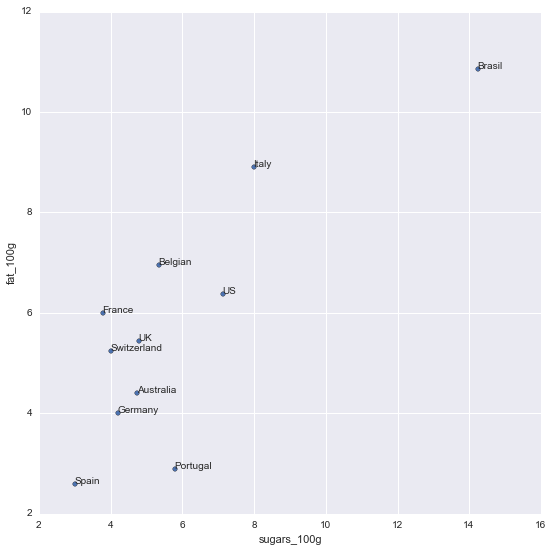

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [9,9]
#p = sns.lmplot('x', 'y', data=plot_data, hue='country', fit_reg=False, ax=ax)
fig, ax = plt.subplots()
fit_data.plot(kind='scatter',x='sugars_100g',y='fat_100g', ax=ax)
for k,v in fit_data.iterrows():
    ax.annotate(v['index'], v[['sugars_100g','fat_100g']])

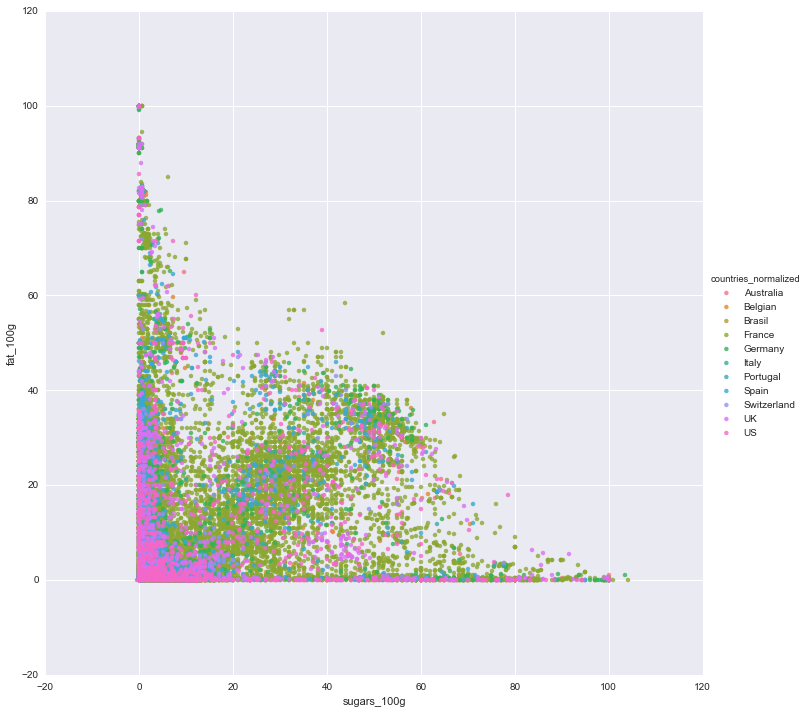

In [54]:
plt.rcParams["figure.figsize"] = [12,12]
sns.lmplot('sugars_100g', 'fat_100g', 
           data=food_vector, 
           fit_reg=False, 
           dropna=True,
           hue="countries_normalized",
          size = 10)

In [ ]:
food_vector[['energy_100g','fat_100g',
    'sugars_100g','carbohydrates_100g','proteins_100g']]

In [ ]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
importr('plyr')